In [1]:
import xarray as xr
import gcsfs
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
ds_faces = xr.open_zarr(gcsfs.GCSMap('pangeo-data/ECCO.zarr'))

In [13]:
#Apply Ryan's code to the dataset
ds_ll=faces_dataset_to_latlon(ds_faces, metric_vector_pairs=[('LaHw3RHO','LaHs3RHO')])

#Exclude 1992 and put the Atlantic in the middle 
ds = (ds_ll.reset_coords(drop=True).roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

#Make a corresponding dataset of the coordinates of ds, with the same conditions as above(?)
coords = (ds_ll.coords.to_dataset().reset_coords().roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

In [4]:
import intake
cat = intake.Catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds_faces1 = cat["ECCOv4r3"].to_dask()

/srv/conda/envs/notebook/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [33]:
#Apply Ryan's code to the dataset
ds_ll=faces_dataset_to_latlon(ds_faces1, metric_vector_pairs=[('dxC', 'dyC'), ('dxG', 'dyG')])

#Exclude 1992 and put the Atlantic in the middle 
ds_ecco = (ds_ll.reset_coords(drop=True).roll(i=180, roll_coords=False))

#Make a corresponding dataset of the coordinates of ds, with the same conditions as above(?)
coords_ecco = (ds_ll.coords.to_dataset().reset_coords().roll(i=180, roll_coords=False)
          .loc[dict(time=slice('1993-01-15','2015-12-14'))]
         .loc[dict(time_snp=slice('1993-02-01','2015-12-01'))])

In [18]:
rho0=1029 
cp=3994

In [52]:
#To get joules/s
z = (ds_ecco.ADVy_TH * rho0 * cp)[1:9, :, 220:259, 110:250]
sig = (ds.LaAy3RHO * cp * rho0)[:9, :, 220:259, 110:250]

In [53]:
adv_z = z.sum(['k', 'i','j_g'])
adv_sig = sig.sum(['l3_c', 'i','j_g'])

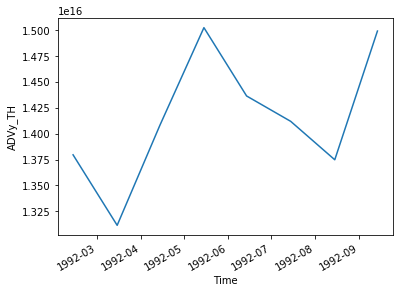

In [54]:
adv_z.plot()

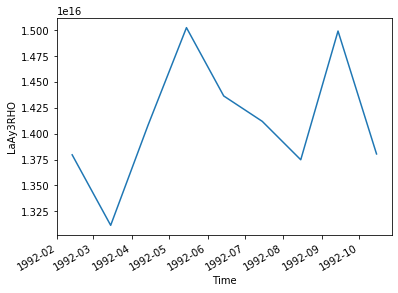

In [51]:
adv_sig.plot()

In [44]:
#Advection over depth of south face 
adv_Z = z.isel(j_g = 0).sum('i')
adv_SIG = sig.isel(j_g=0).sum('i')

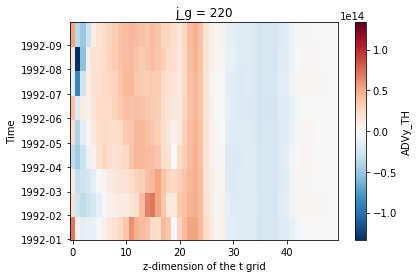

In [45]:
adv_Z.plot()

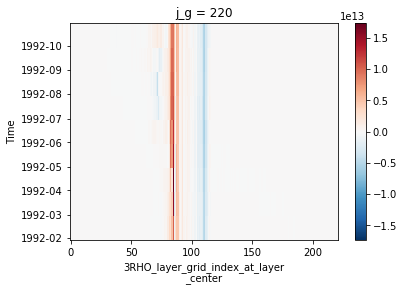

In [46]:
adv_SIG.plot()